# Feature Selection

- Apply the Random Forest to check accuracy
- Apply the Random Forest to select features
- Recalibrate the dataset and present results


## Part 1: Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score


## Part 2: Preprocessing and training model

We are going to use the wine quality database, consisting of 12 columns and 1600 rows.

In [2]:
#Data Import
dataset_url = 'http://mlr.cs.umass.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
data = pd.read_csv(dataset_url,sep=';')

#Split data
y = data.quality
X = data.drop('quality', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=123,stratify=y)

#Train algorithm
feat_labels = data.columns[0:11]
forest = RandomForestClassifier(n_estimators=1000,random_state=0,n_jobs=-1)
forest.fit(X_train,y_train)

#Print MAE and Accuracy
predictions = forest.predict(X_test)
errors = abs(predictions - y_test)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 0.33 degrees.
Accuracy: 93.97 %.


## Part 3: Features Observation

The aim of the experiment is to identify and experiment with the most imformative features. The most informative featuers is a topic that is not examined here but there is wide literature and different approached.

An interestint article is: https://blog.datadive.net/selecting-good-features-part-iii-random-forests/

 1) alcohol                        0.148258
 2) sulphates                      0.111300
 3) volatile acidity               0.109594
 4) total sulfur dioxide           0.100977
 5) density                        0.092191
 6) chlorides                      0.081019
 7) fixed acidity                  0.075070
 8) citric acid                    0.074133
 9) pH                             0.072889
10) residual sugar                 0.068940
11) free sulfur dioxide            0.065629


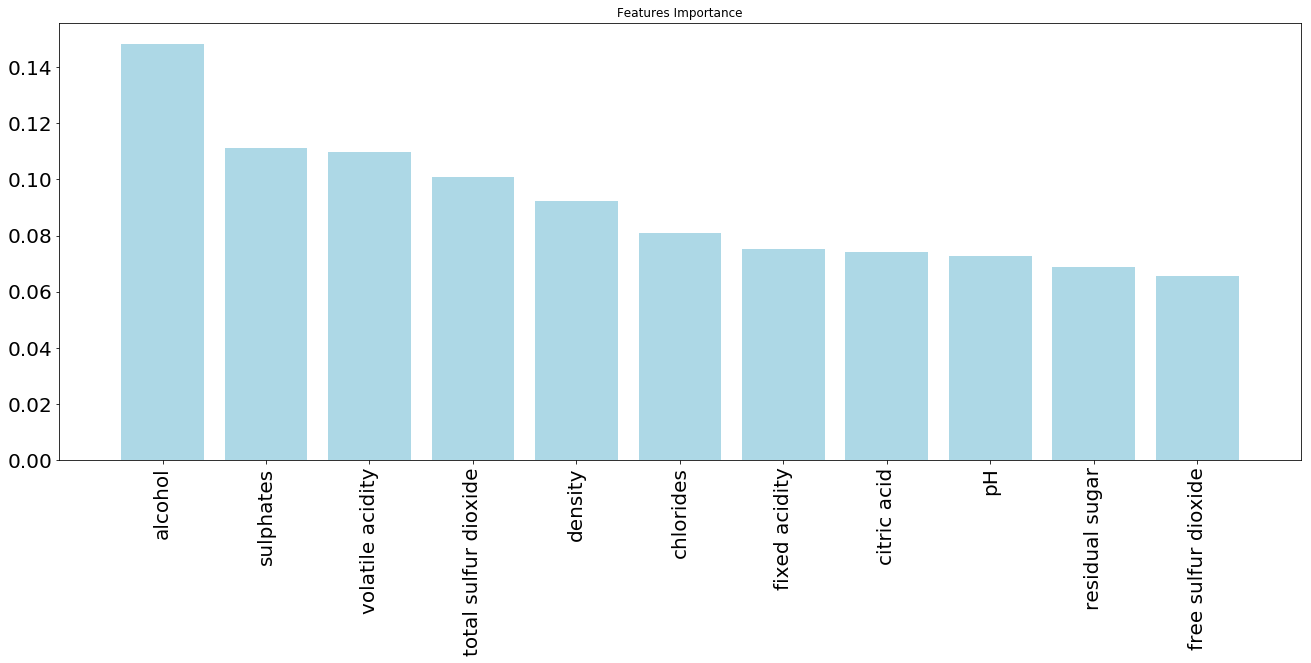

In [8]:

#Print Important features
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]

for f in range (X_train.shape[1]):
    print (("%2d) %-*s %f" % (f + 1,30,feat_labels[indices[f]],importances[indices[f]])))

#Print important features (graph)
plt.figure(figsize=(18, 8))
plt.title("Features Importance")
plt.bar(range(X_train.shape[1]), importances[indices],color="lightblue",align='center')
plt.xticks(range(X_train.shape[1]), feat_labels[indices],rotation=90)
plt.xlim([-1,X_train.shape[1]])
plt.tight_layout()
plt.xticks(size = 20)
plt.yticks(size = 20)

plt.show()

## Part 4: Features Selection

Now that we have seen the important features, we manually select a threshold for features selection. The threshold for the particular experiment was placed to 0,10. A threshold can be placed by both observing and calculating different variables. For this experiment, the method that was used was pure observation.

In [5]:
#Feature selection run
sfm = SelectFromModel(forest, threshold=0.10)
sfm.fit(X_train, y_train)

#Present selected threshold
for feature_list_index in sfm.get_support(indices=True):
    print(feat_labels[feature_list_index])

volatile acidity
total sulfur dioxide
sulphates
alcohol


## Part 5: Re-train the Algorithm

We have seen that there are 4 features that are informative. As such, we will re-train the algorithm using those 4 features.

In [6]:

#New data extraction
X_important_train = sfm.transform(X_train)
X_important_test = sfm.transform(X_test)

#Apply algorithm
clf_important = RandomForestClassifier(n_estimators=1000, random_state=0, n_jobs=-1)
clf_important.fit(X_important_train, y_train)

#Present MAE and Accuracy
predictions = clf_important.predict(X_important_test)
errors = abs(predictions - y_test)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')


Mean Absolute Error: 0.38 degrees.
Accuracy: 92.91 %.


## Conclusion:

The results show a small decline of the MAE and the accuracy but, instead of 11 features, we reduced it to 4 with the cost of 1% of accuracy. Is it a loss that we can accept? Depends on the experiment and the strictness on the rules of selecting a model.